In [ ]:
OMP_NUM_THREADS=2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 15, 5
sns.set_style('darkgrid')

In [3]:
WholesaleC_df = pd.read_csv('Wholesale customers data.csv')
WholesaleC_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [4]:
WholesaleC_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
WholesaleC_df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [6]:
WholesaleC_df.drop_duplicates(inplace=True)

In [7]:
WholesaleC_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 30.9 KB


In [8]:
WholesaleC_df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [9]:
WholesaleC_df.nunique()

Channel               2
Region                3
Fresh               433
Milk                421
Grocery             430
Frozen              426
Detergents_Paper    417
Delicassen          403
dtype: int64

# Visualizing data distributions

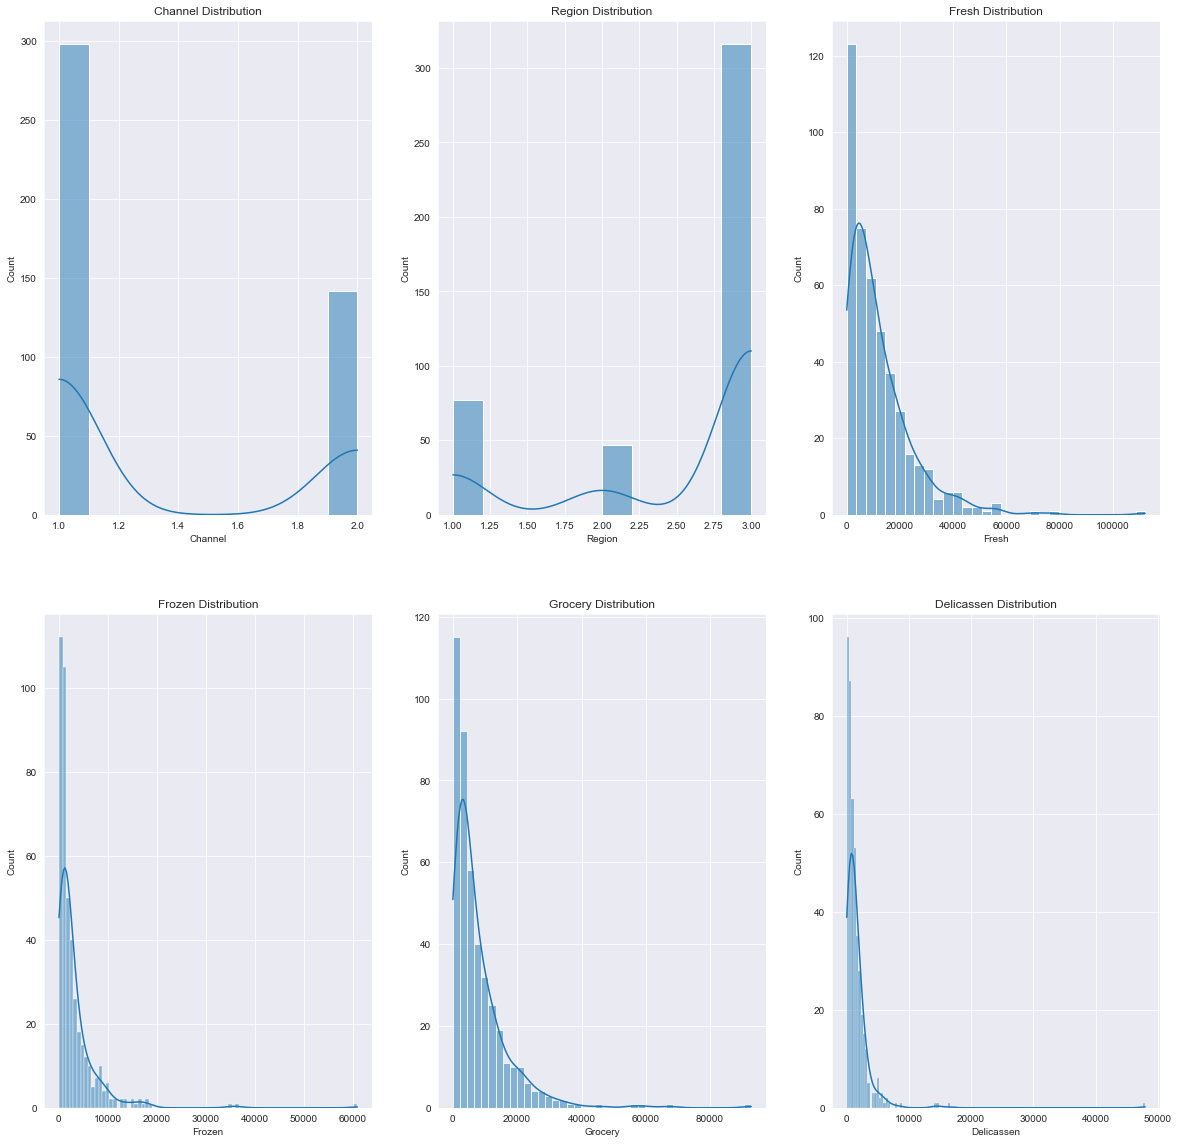

In [10]:
fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize= (20,20))

sns.histplot(x = WholesaleC_df['Channel'], kde=True, ax = axs[0][0]).set_title('Channel Distribution')
sns.histplot(x = WholesaleC_df['Region'], kde=True, ax = axs[0][1]).set_title('Region Distribution')
sns.histplot(x = WholesaleC_df['Fresh'], kde=True, ax = axs[0][2]).set_title('Fresh Distribution')
sns.histplot(x = WholesaleC_df['Frozen'], kde=True, ax = axs[1][0]).set_title('Frozen Distribution')
sns.histplot(x = WholesaleC_df['Grocery'], kde=True, ax = axs[1][1]).set_title('Grocery Distribution')
sns.histplot(x = WholesaleC_df['Delicassen'], kde=True, ax = axs[1][2]).set_title('Delicassen Distribution')


plt.show()

# conclusion
#A large majority of the customers were within Horeca as opposed to reatail.

#A the number of customers from Lisnon(region1) and from Oporto(region2) are comparable, however the number of customers from other regions is over 3 times as much as either of them.

#The graphs for grocery, frozen, fresh, and declicassen are all right skwed graphs. They all have a majority of their counts at or near zero. 

<AxesSubplot:ylabel='None'>

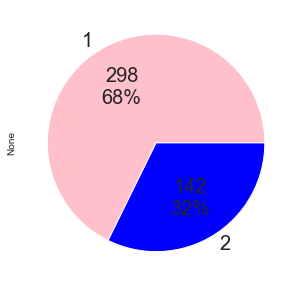

In [12]:
 
def label_function(val):
    return f'{val / 100 * len(WholesaleC_df):.0f}\n{val:.0f}%'

WholesaleC_df.groupby('Channel').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                colors=['pink', 'blue', 'red'])

In [13]:
#A majority of the sales come from Horeca(1) which makes sense
# as that field is centered around the selling of foods or beverages. 

# A minority of the customer base are in the retail business. 

#Horeca = 1
#Retail  = 2



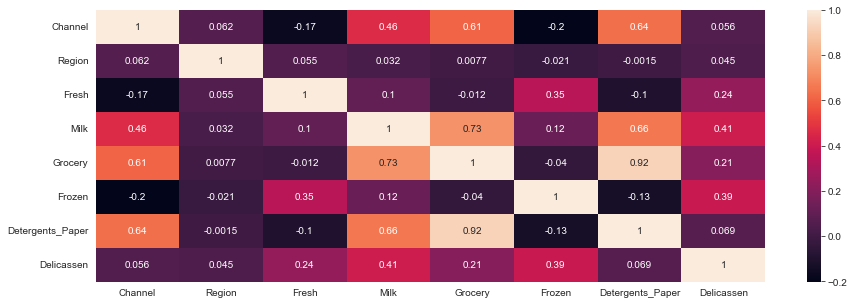

In [14]:
sns.heatmap(WholesaleC_df.corr(), annot=True)
plt.show()

#conclusion 

#There seems to be a moderately strong relationship between channel and detergent paper. This is mostly because different channels
#order different amounts of food and as such the amount of detergent paper is scaled as well.

#There seems to be a moderate relationship between grocery and channel. The existance of a relationship makes sense due to the differences in
#the purpose of the food. In Horeca the food and it's ingredents are often times consumed after one meal, while in retail the ingredients typically end up lasting more than one meal.

#There is a moderately strong relationship between milk and grocery. This is most likely due to milk products being purchased alongside other grocery products
#in order to create a dish(for instance cake).

#There seems to be a relationship between detergens paper and milk. This is most likely tied to an increase in ingredients warranting an increase in cleaning supplies.

#There seems to be a very strong relationship between grocery and detergent paper. This is most likely because an increase in grocery requires an increase in cleaning supplies in order to keep up.

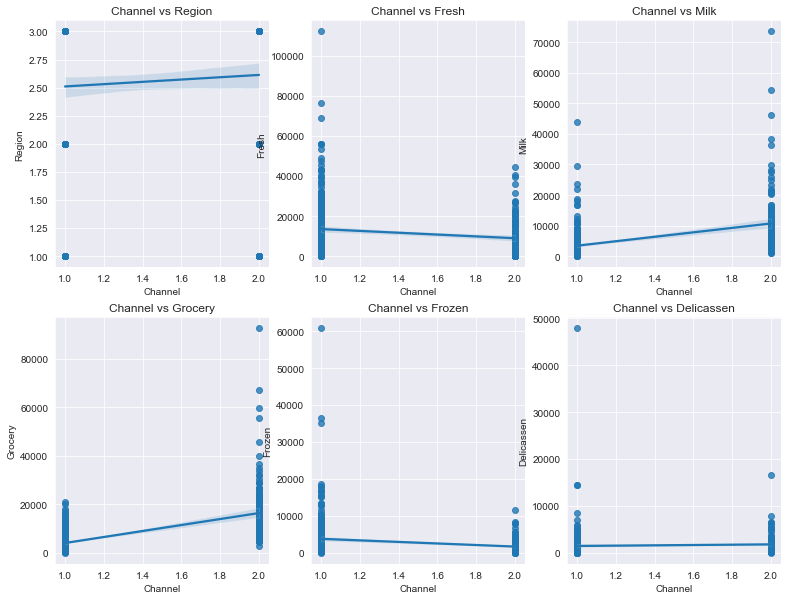

In [16]:


fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize= (13,10))
sns.regplot(x = WholesaleC_df['Channel'], y = WholesaleC_df['Region'], ax = axs[0][0]).set_title('Channel vs Region')
sns.regplot(x = WholesaleC_df['Channel'], y = WholesaleC_df['Fresh'], ax = axs[0][1]).set_title('Channel vs Fresh')
sns.regplot(x = WholesaleC_df['Channel'], y = WholesaleC_df['Milk'], ax = axs[0][2]).set_title('Channel vs Milk')

sns.regplot(x = WholesaleC_df['Channel'], y = WholesaleC_df['Grocery'], ax = axs[1][0]).set_title('Channel vs Grocery')
sns.regplot(x = WholesaleC_df['Channel'], y = WholesaleC_df['Frozen'], ax = axs[1][1]).set_title('Channel vs Frozen')
sns.regplot(x = WholesaleC_df['Channel'], y = WholesaleC_df['Delicassen'], ax = axs[1][2]).set_title('Channel vs Delicassen')


plt.show()

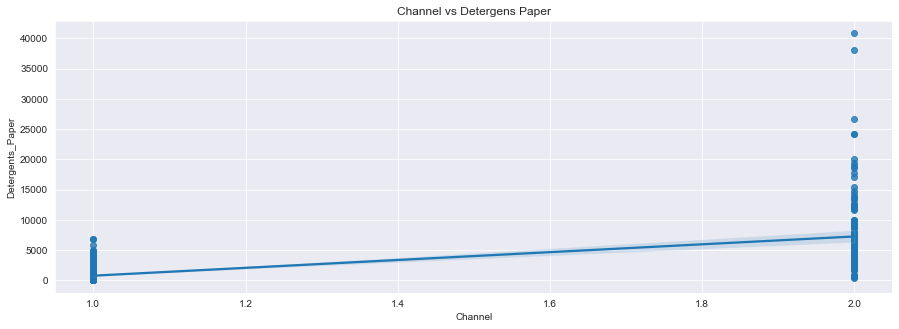

In [17]:
sns.regplot(x = WholesaleC_df['Channel'], y = WholesaleC_df['Detergents_Paper']).set_title('Channel vs Detergens Paper')
plt.show()

#Viewing the data in respect to the channel seems to only reveal a few, at most moderate=ly strong relationships.

#While a majority of the relationships revealed are of moderate influence, the existence of relationsbips in the first place is something to take note of. 

#There's a higher amount of milk ordered from retail customers.

#A higher amount of fresh products ordered from the Horeca base.

#A higher amount of Groceries ordered by the retail base.

#A higher amount of detergens paper ordered by the retail base.

In [19]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [20]:
scaler = MinMaxScaler()

In [21]:
cols = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
WholesaleC_df
WholesaleC_df[cols] = scaler.fit_transform(WholesaleC_df[cols])
cols2 = ['Region','Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
newdata = WholesaleC_df[cols2]

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(newdata) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head()

,P1,P2
0,-0.457152,0.019150
1,-0.456748,0.043751
2,-0.457034,0.039196
3,-0.456486,-0.093579
4,-0.457783,-0.021898


**In this case since I had a high dimensional data set I implemented PCA first to help reduce the number of dimensions. This will help later on the visualize the clusters in a graph format.**

In [23]:
from sklearn.cluster import KMeans
n_clusters = [1,2,3,4,6,8]
inertia = []
for k in n_clusters:
    kmeans = KMeans(init="k-means++", n_clusters=k , random_state=0)
    kmeans.fit(X_principal)
    inertia.append(kmeans.inertia_)

D:\Anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


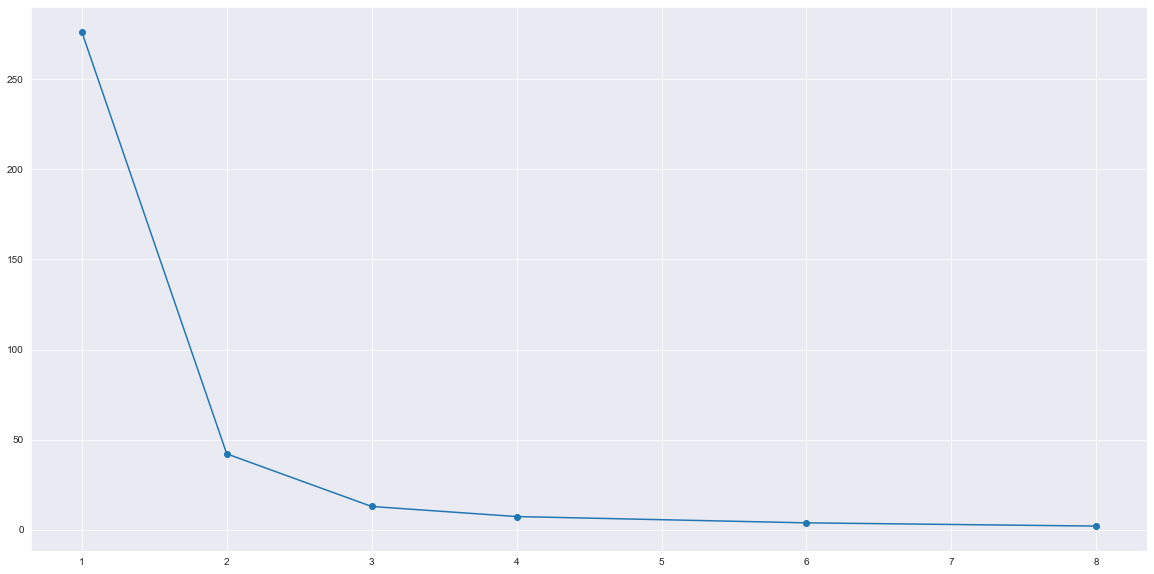

In [24]:
fig,ax = plt.subplots(1,1, figsize = (20,10))
ax.plot(n_clusters, inertia)
ax.scatter(n_clusters, inertia)

**For the model I decided to use the elbow method in order to determine what number of k will be the best to work with. For this method the number of k is found by graphing the total within-cluster variation for a multitude of k values and then choose the value which resulted in the largest decline. For our example this will be 2, thus we will try to separate the data into 2 partitions.**

In [25]:
kmeans = KMeans(init="k-means++", n_clusters=2 , random_state=0)
kmeans.fit(X_principal)

KMeans(n_clusters=2, random_state=0)

In [26]:
prediction = kmeans.predict(X_principal)

<AxesSubplot:xlabel='P1', ylabel='P2'>

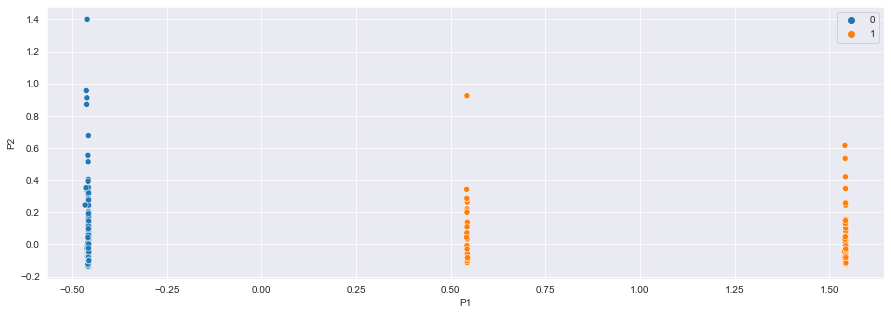

In [27]:
sns.scatterplot(data = X_principal,  x = "P1", y = "P2", hue = prediction)

**After choosing k = 2 I run the algorithm on that number of k and then create a plot to see any differences among the clusters. It became evident that cluster 0 were data observations with a low PC1 and a high PC2. While cluster 1 were data observations with a higher PC1 and a lower PC2.**

In [28]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
WholesaleC_df["Channel"]= label_encoder.fit_transform(WholesaleC_df["Channel"])

<AxesSubplot:xlabel='P1', ylabel='P2'>

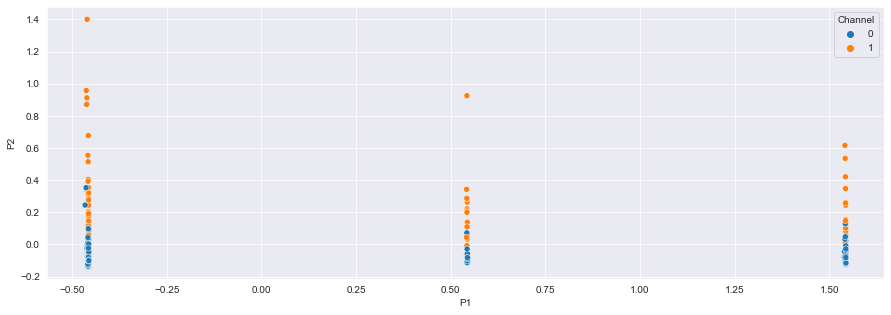

In [29]:
sns.scatterplot(data = X_principal,  x = "P1", y = "P2", hue = WholesaleC_df["Channel"])

**I then tried to plot the channel on the graph to see if there was any similarities between the clusters and the channel. First however I need to implement label encoding so that the clusters and the channels would be on the same type of scale. Then I proceed to plot the channels based on their correlation to PC1 and PC2. From this I found that PC2 seem to play a role in which channel a data point was in. The higher the PC2 the more likely it belonged to channel 2 and the lower the PC2 the more likely the observation belonged to channel 1.**

<AxesSubplot:>

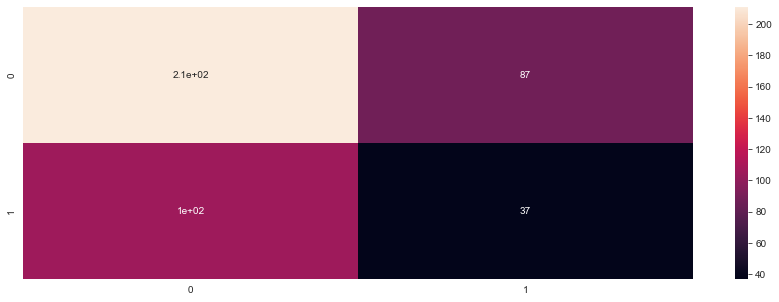

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(WholesaleC_df["Channel"], prediction)
sns.heatmap(cm, annot = True)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(WholesaleC_df["Channel"], prediction))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69       298
           1       0.30      0.26      0.28       142

    accuracy                           0.56       440
   macro avg       0.48      0.48      0.48       440
weighted avg       0.55      0.56      0.56       440



**Using K-means it was apparent that the cluster seperation only related to the channel seperation about 50% of the time.**

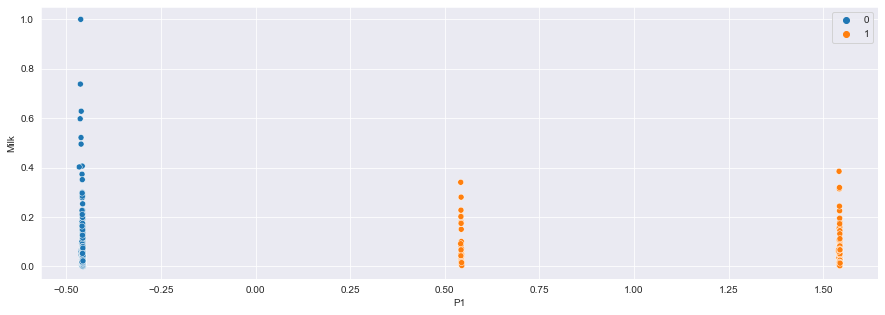

In [32]:
#The following graphs will be comparing the separate categories with the P1 values.

sns.scatterplot(x = X_principal["P1"], y = WholesaleC_df['Milk'], hue = prediction)
plt.show()

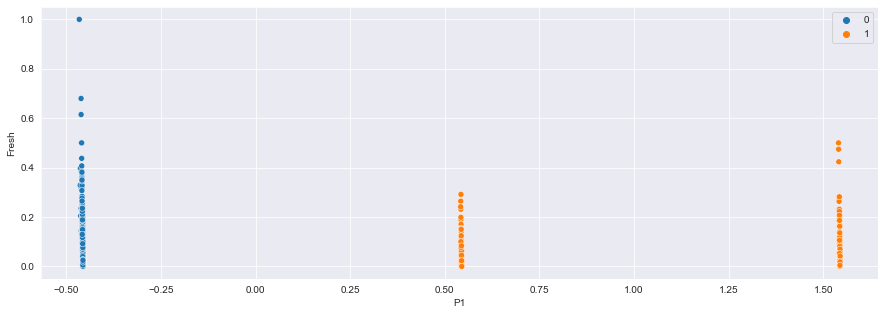

In [33]:
sns.scatterplot(x = X_principal["P1"], y = WholesaleC_df['Fresh'], hue = prediction)
plt.show()

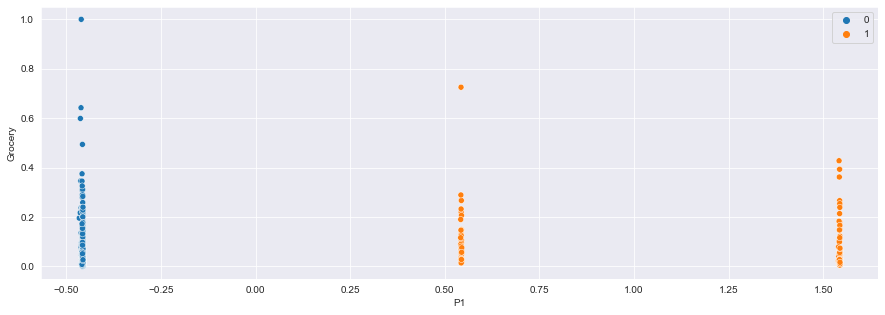

In [34]:
sns.scatterplot(x = X_principal["P1"], y = WholesaleC_df['Grocery'], hue = prediction)
plt.show()

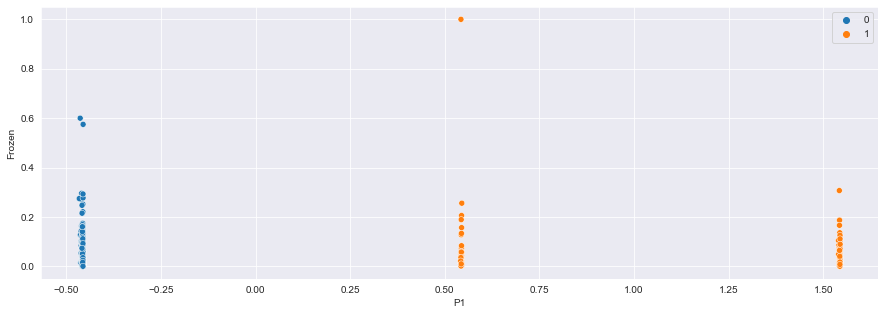

In [35]:
sns.scatterplot(x = X_principal["P1"], y = WholesaleC_df['Frozen'], hue = prediction)
plt.show()

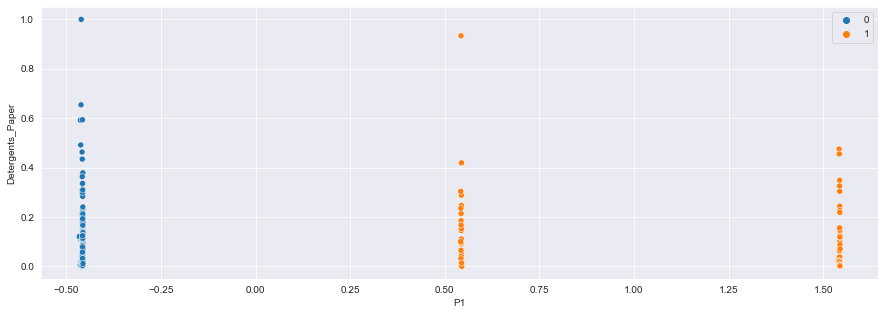

In [36]:
sns.scatterplot(x = X_principal["P1"], y = WholesaleC_df['Detergents_Paper'], hue = prediction)
plt.show()

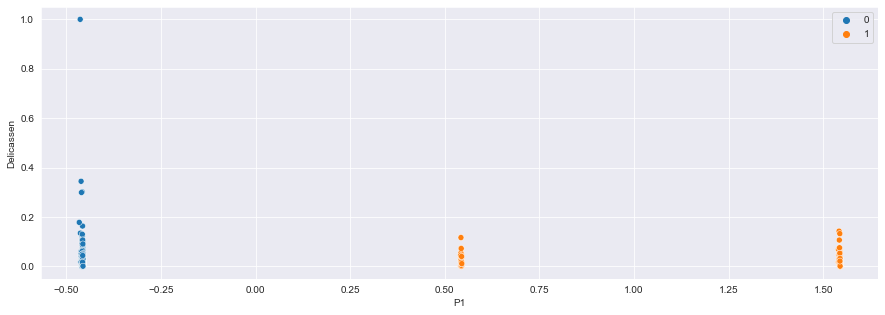

In [37]:
sns.scatterplot(x = X_principal["P1"], y = WholesaleC_df['Delicassen'], hue = prediction)
plt.show()

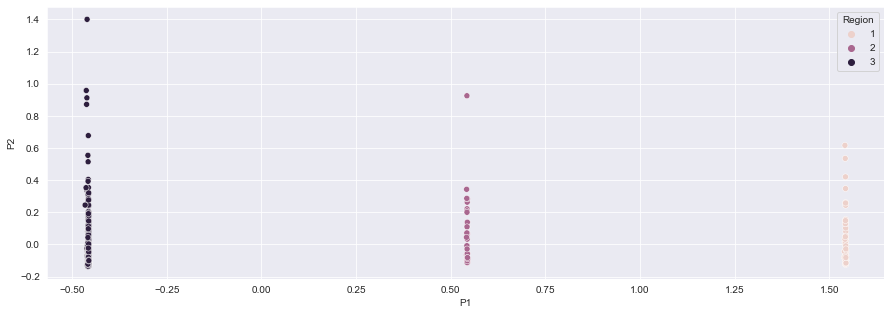

In [38]:
#This plot represents comparing the P1 and P2 values with Region to show the clustering differences between the different
#regions.

sns.scatterplot(x = X_principal["P1"], y = X_principal["P2"], hue = WholesaleC_df['Region'])
plt.show()

In [39]:
# Let’s first draw the dendrogram to help us decide the number of clusters for this particular problem.

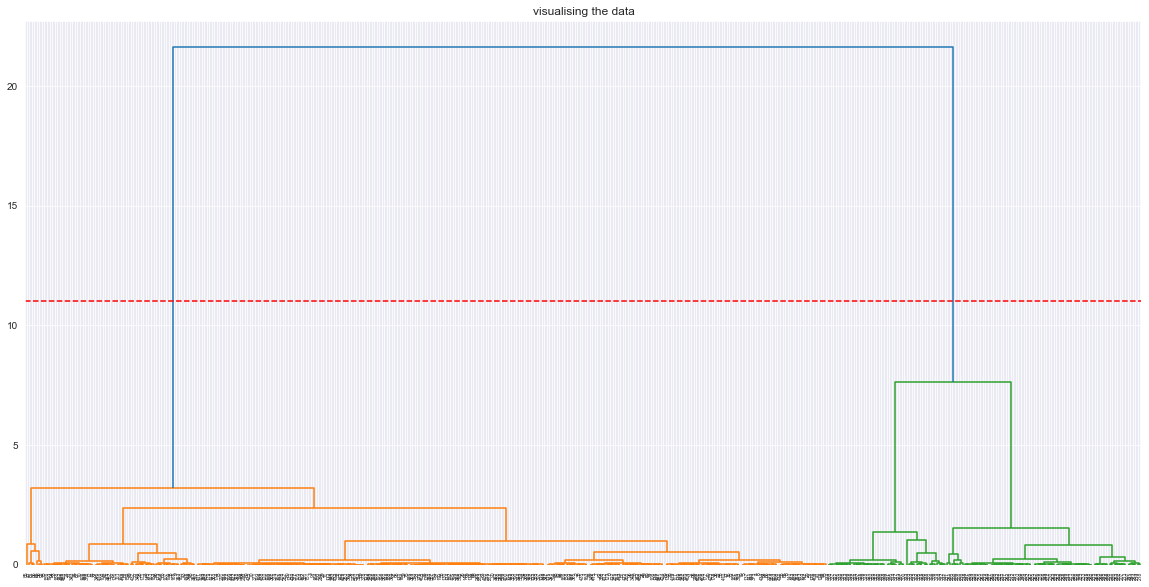

In [40]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(20, 10))
plt.title('visualising the data') 
Dendrogram = shc.dendrogram((shc.linkage(X_principal, method ='ward')))
plt.axhline(y=11, color='r', linestyle='--')

In [41]:
# The x-axis contains the samples and y-axis represents the distance between these samples.
#  The vertical line with maximum distance is the blue line and hence we can decide a threshold of 11 and cut the dendrogram.

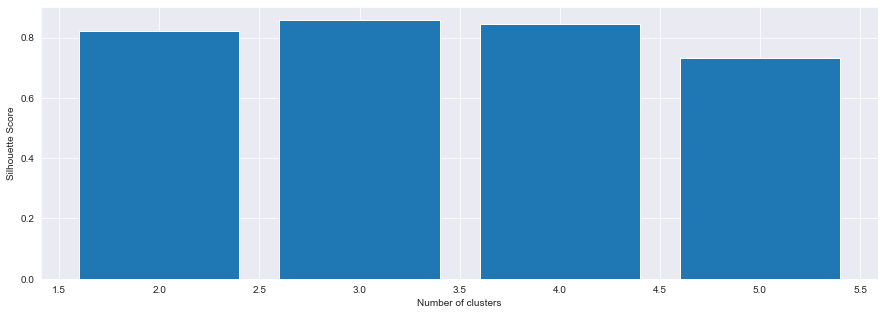

In [42]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score

silhouette_scores = [] 

for n_cluster in range(2, 6):
    silhouette_scores.append(silhouette_score(X_principal,
                                              AgglomerativeClustering(n_clusters = n_cluster).fit_predict(X_principal))) 
    
plt.bar(x=range(2, 6), height=silhouette_scores) 
plt.xlabel('Number of clusters') 
plt.ylabel('Silhouette Score') 
plt.show() 

In [43]:
# Build and visualize a clustering model for n_clusters = 2

In [44]:
agg = AgglomerativeClustering(n_clusters=2)
agg.fit(X_principal)

AgglomerativeClustering()

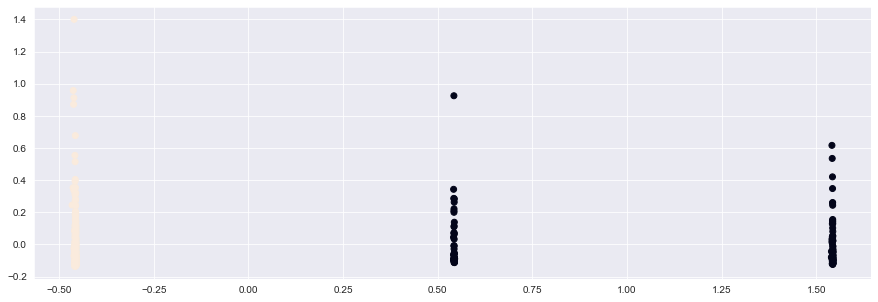

In [45]:
plt.scatter(X_principal['P1'], X_principal['P2'],
            c = AgglomerativeClustering(n_clusters = 2).fit_predict(X_principal)) 
plt.show() 

By analyzing the Wholesale Customers dataset I found valuable insights into customer segmentation and spending patterns. The dataset contained 440 entries with features like Fresh, Milk, Grocery, Frozen, Detergents_Paper, and Delicassen, representing wholesale spending across various product categories. Initial exploration highlighted strong correlations between features such as Grocery and Detergents_Paper, suggesting common purchasing patterns. Skewed distributions were observed, indicating that a few customers had significantly higher spending than others.

To simplify and visualize the dataset, Principal Component Analysis (PCA) was used to reduce the dimensionality from six features to two principal components (PC1 and PC2). These two components explained the majority of the variance in the data and highlighted separable groupings, facilitating the clustering task. The PCA results provided a clear foundation for identifying distinct clusters and revealed spending patterns that differentiated customer groups.

Clustering analysis using K-Means identified two main clusters, with the optimal number determined through the Elbow Method. Cluster 0 consisted of customers with low PC1 and high PC2 values, indicating focused spending in specific categories. In contrast, Cluster 1 encompassed customers with high PC1 and low PC2 values, reflecting broader and more diverse spending patterns. The visualization of clusters on PCA-transformed data demonstrated clear separations between these groups. The clustering results showed partial alignment with the Channel feature, which distinguishes Horeca (hotel/restaurant/café) businesses from retailers, suggesting a meaningful relationship between clusters and customer types.

Hierarchical clustering provided additional validation, with a dendrogram supporting the two-cluster structure identified by K-Means. This consistency across methods reinforced the reliability of the segmentation. Overall, the clustering results revealed actionable insights for customer targeting. Customers in Cluster 0 likely represented smaller retailers with niche spending needs, and strategies such as offering bulk discounts on specific products could drive sales. On the other hand, Cluster 1 included larger clients or Horeca businesses with diverse purchasing patterns, which could benefit from premium services and a broad range of inventory options.

This analysis highlights the value of clustering and dimensionality reduction in segmenting customers and tailoring business strategies. These techniques provide a clear framework for understanding customer behavior and optimizing resource allocation for targeted marketing efforts. If further refinement or specific visualizations are required, additional analysis can be performed.